In [1]:
import pandas as pd

#Loading the data
df = pd.read_csv("D:\DS\EDA1\EDA1\Cardiotocographic.csv")

df.head

<>:4: SyntaxWarning: invalid escape sequence '\D'
<>:4: SyntaxWarning: invalid escape sequence '\D'
C:\Users\GAURI DUBEY\AppData\Local\Temp\ipykernel_3424\4236893171.py:4: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv("D:\DS\EDA1\EDA1\Cardiotocographic.csv")


<bound method NDFrame.head of               LB        AC        FM        UC        DL   DS   DP  ASTV  \
0     120.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0  73.0   
1     132.000000  0.006380  0.000000  0.006380  0.003190  0.0  0.0  17.0   
2     133.000000  0.003322  0.000000  0.008306  0.003322  0.0  0.0  16.0   
3     134.000000  0.002561  0.000000  0.007742  0.002561  0.0  0.0  16.0   
4     131.948232  0.006515  0.000000  0.008143  0.000000  0.0  0.0  16.0   
...          ...       ...       ...       ...       ...  ...  ...   ...   
2121  140.000000  0.000000  0.961268  0.007426  0.000000  0.0  0.0  79.0   
2122  140.000000  0.000775  0.000000  0.006979  0.000000  0.0  0.0  78.0   
2123  140.000000  0.000980  0.000000  0.006863  0.000000  0.0  0.0  79.0   
2124  140.000000  0.000679  0.000000  0.006110  0.000000  0.0  0.0  78.0   
2125  142.000000  0.001616 -0.000188  0.008078  0.000000  0.0  0.0  74.0   

      MSTV       ALTV  MLTV  Width  Tendency       NSP  


In [3]:
#checking for any missing values in the dataset and handling them 

#checking
missing_values = df.isnull().sum()
print("Missing Values in each column \n" , missing_values)

#Impute or droping missing values
df.fillna(df.median(), inplace=True)

Missing Values in each column 
 LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64


In [4]:
#verifying and correcting any inconsistencies in the data type

#checking datatype
print("Data type before conversion : \n", df.dtypes)



Data type before conversion : 
 LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object


In [6]:
#detecing and treating outliers using Z-score

import numpy as np
from scipy import stats

#detecting outliers
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
outliers= (z_scores > 3).any(axis=1)
print("Number of outliers detected:" , np.sum(outliers))

# Treating outliers 
df = df[(z_scores < 3).all(axis=1)]

Number of outliers detected: 257


In [7]:
#statistics summary

summary = df.describe().T
summary['median'] = df.median()
summary['IQR'] = df.quantile(0.75) - df.quantile(0.25)
print(summary)


           count          mean           std         min         25%  \
LB        1869.0  1.333035e+02  9.899678e+00  106.000000  126.000000   
AC        1869.0  3.177665e-03  3.770350e-03   -0.000185    0.000000   
FM        1869.0  4.239526e-03  1.355382e-02   -0.005106    0.000000   
UC        1869.0  4.390969e-03  2.904462e-03   -0.000132    0.002002   
DL        1869.0  1.732029e-03  2.705466e-03   -0.000124    0.000000   
DS        1869.0  1.186182e-08  5.854019e-07   -0.000007    0.000000   
DP        1869.0  1.001085e-04  4.044223e-04   -0.000045    0.000000   
ASTV      1869.0  4.687087e+01  1.683452e+01   11.799846   32.000000   
MSTV      1869.0  1.283173e+00  7.780992e-01    0.200000    0.700000   
ALTV      1869.0  9.193894e+00  1.657476e+01   -1.043619    0.000000   
MLTV      1869.0  8.320356e+00  5.227228e+00   -0.200788    4.900000   
Width     1869.0  6.889575e+01  3.761421e+01    7.000000   37.000000   
Tendency  1869.0  3.290482e-01  6.017532e-01   -1.006614    0.00

In [13]:
# Highlighting findings 
threshold = 10
high_variance = summary[summary['std'] > threshold] 
print("Columns with high variance:\n", high_variance)

Columns with high variance:
         count       mean        std        min   25%   50%   75%    max  \
ASTV   1869.0  46.870868  16.834525  11.799846  32.0  48.0  61.0   87.0   
ALTV   1869.0   9.193894  16.574763  -1.043619   0.0   0.0  11.0   73.0   
Width  1869.0  68.895751  37.614211   7.000000  37.0  66.0  98.0  180.0   

       median   IQR  
ASTV     48.0  29.0  
ALTV      0.0  11.0  
Width    66.0  61.0  


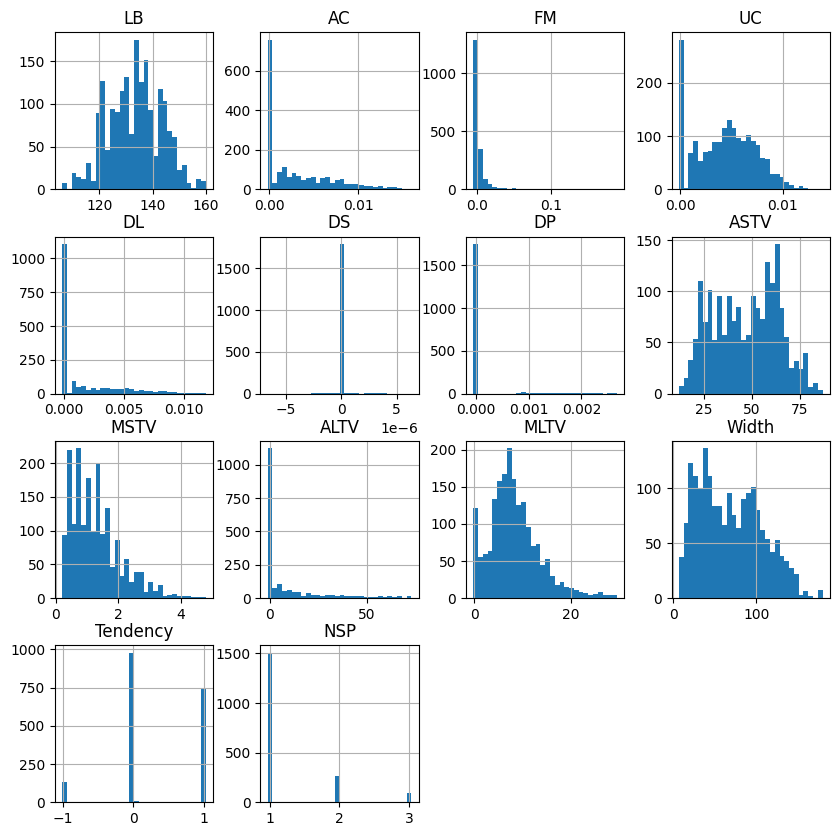

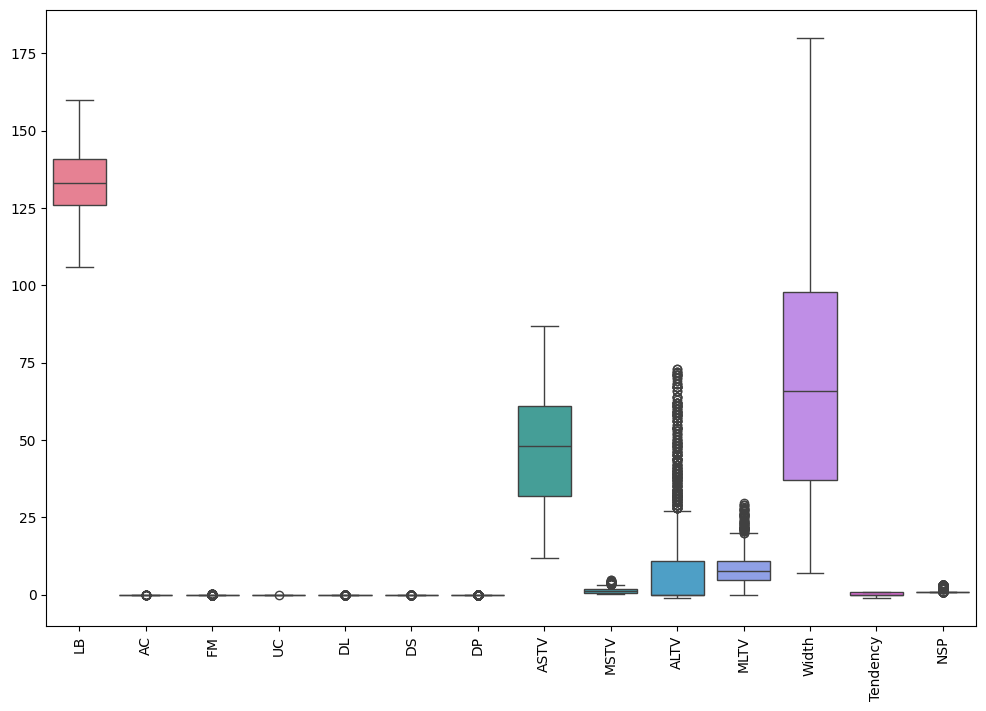

In [14]:
#visualization --> Numerical

import matplotlib.pyplot as plt
import seaborn as sns

#histograms
df.hist(figsize=(10,10),bins=30)
plt.show()

#bozplot
plt.figure(figsize=(12,8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

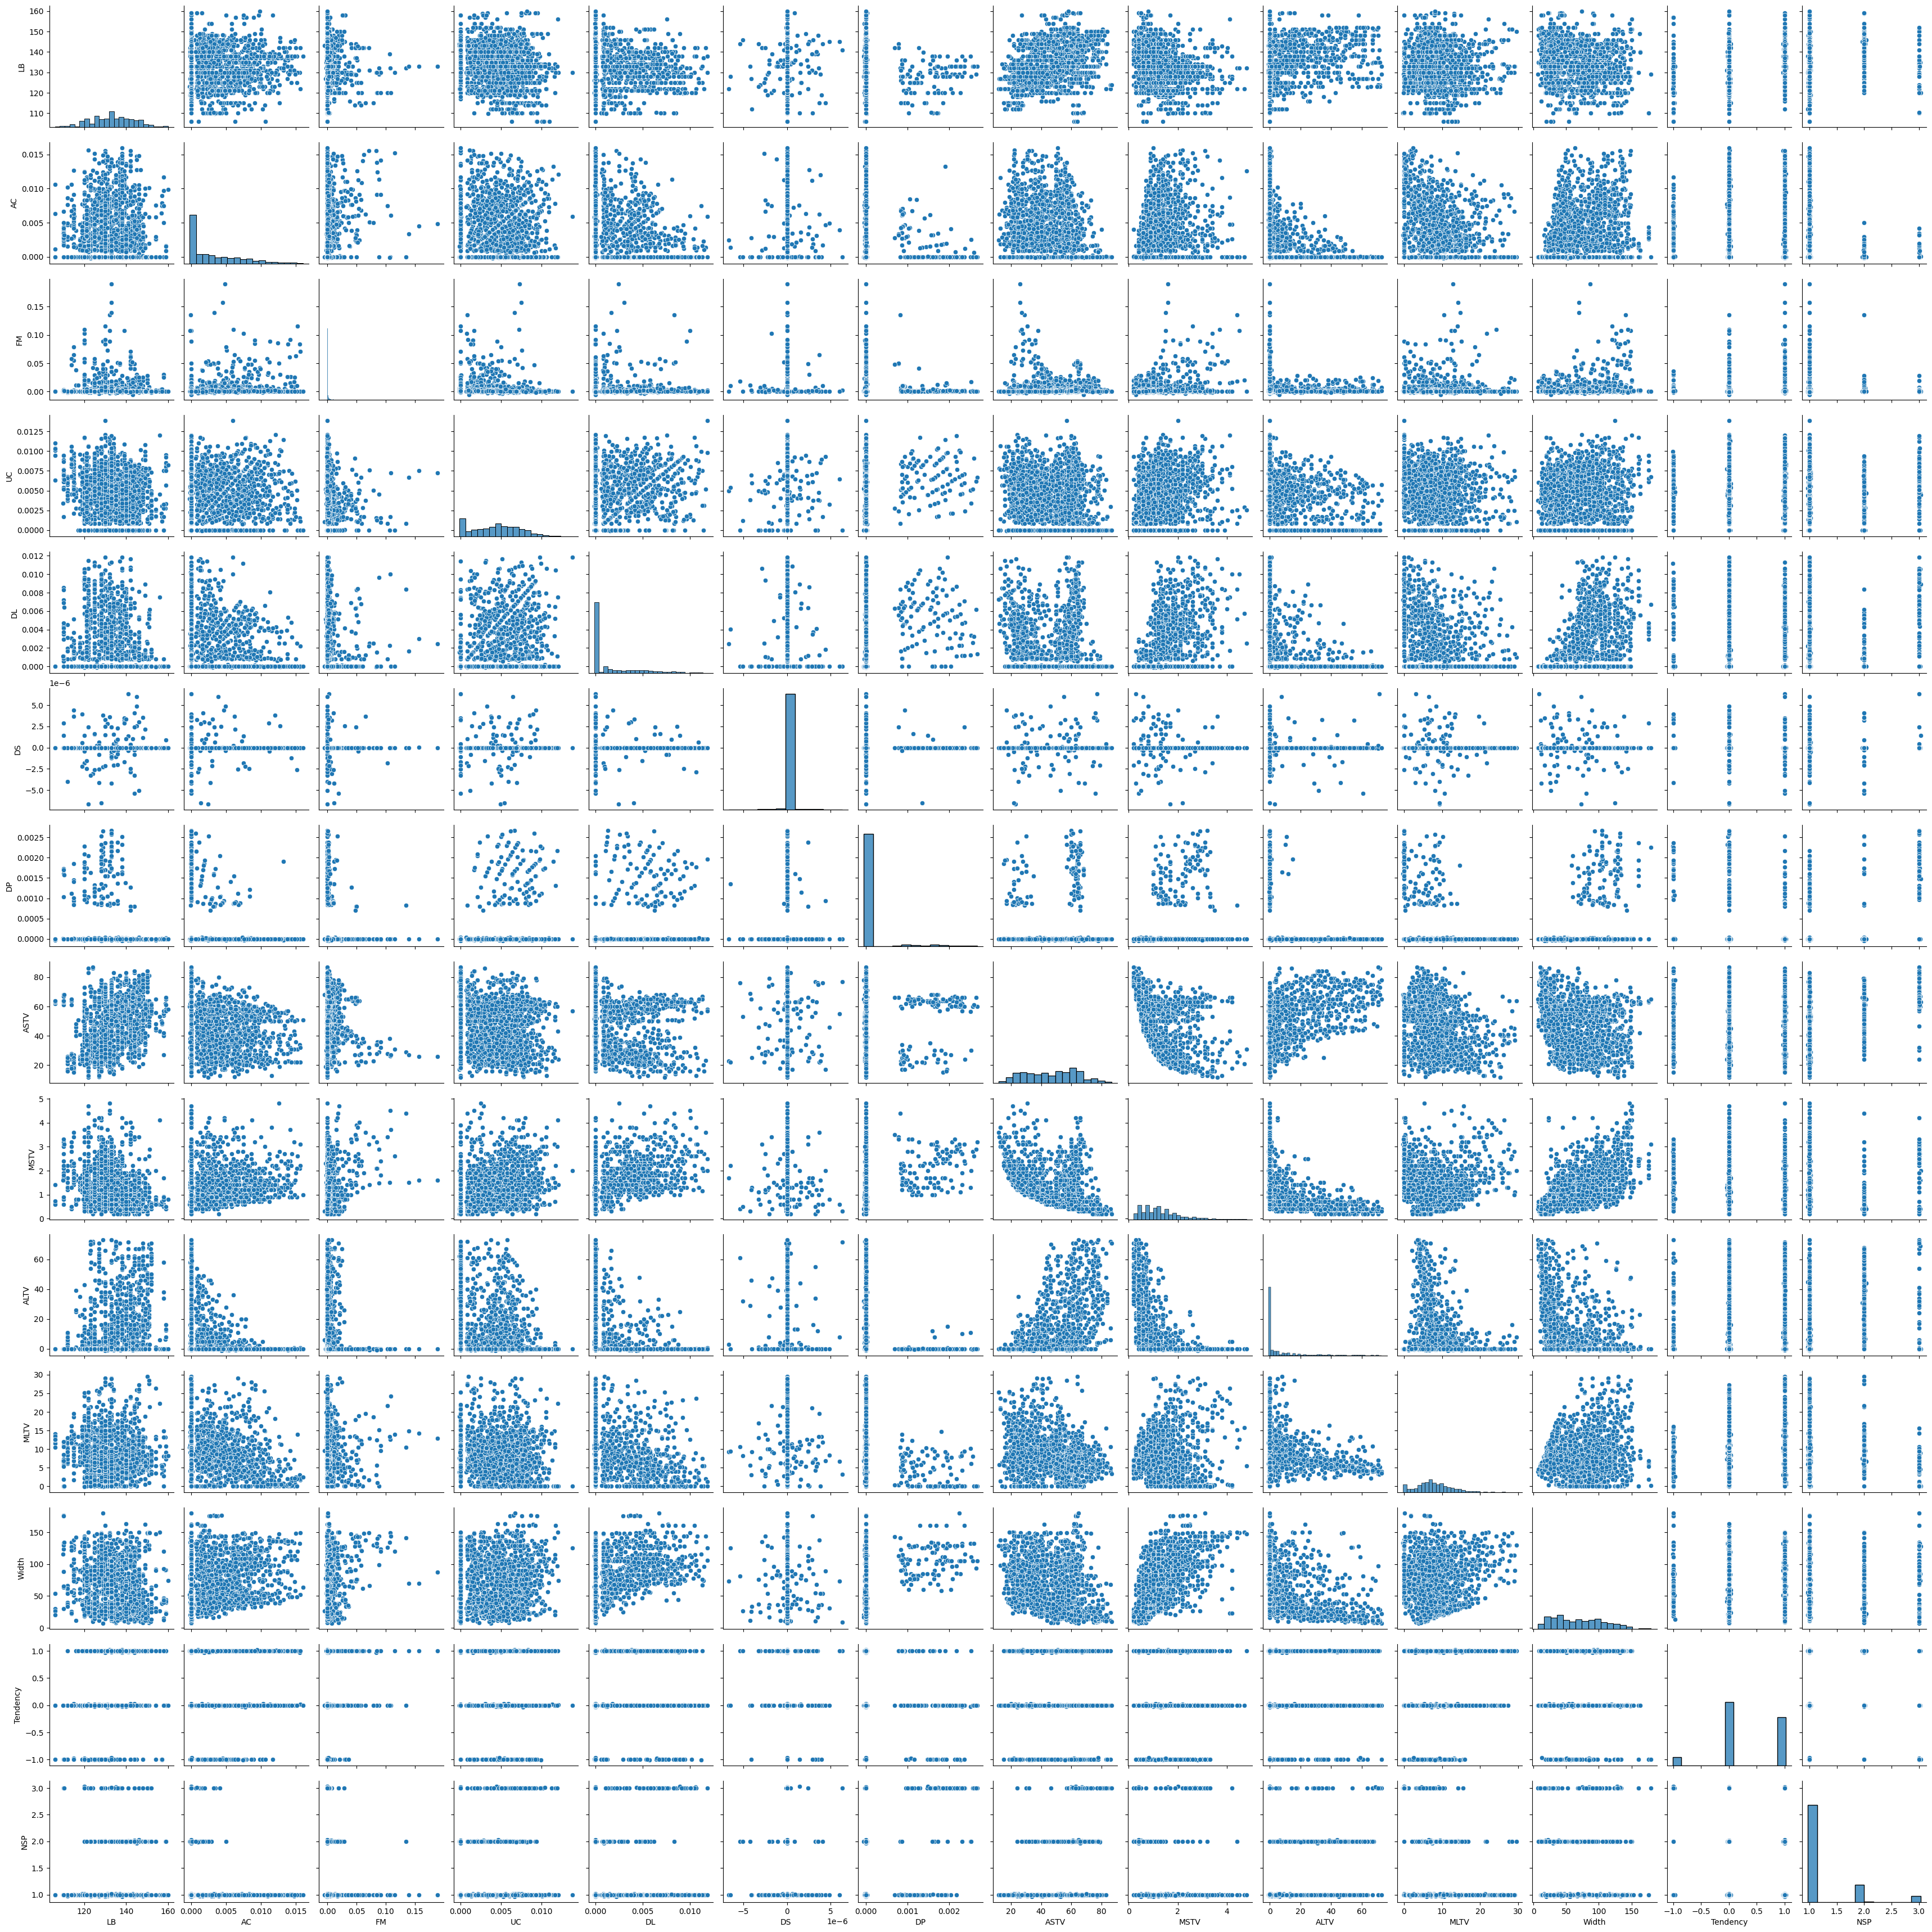

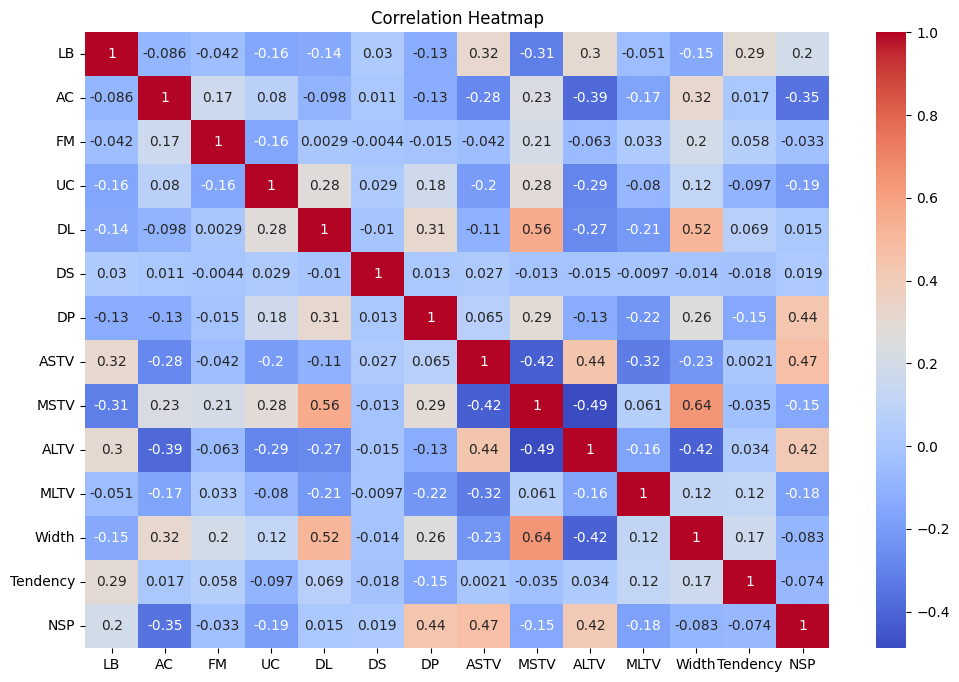

In [28]:
# Scatter plots
sns.pairplot(df)
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [36]:
# Correlation analysis
strong_correlations = correlation_matrix[(correlation_matrix > 0.5) | (correlation_matrix < -0.5)]
print("Strong correlations:\n", strong_correlations)


Strong correlations:
            LB   AC   FM   UC        DL   DS   DP  ASTV     MSTV  ALTV  MLTV  \
LB        1.0  NaN  NaN  NaN       NaN  NaN  NaN   NaN      NaN   NaN   NaN   
AC        NaN  1.0  NaN  NaN       NaN  NaN  NaN   NaN      NaN   NaN   NaN   
FM        NaN  NaN  1.0  NaN       NaN  NaN  NaN   NaN      NaN   NaN   NaN   
UC        NaN  NaN  NaN  1.0       NaN  NaN  NaN   NaN      NaN   NaN   NaN   
DL        NaN  NaN  NaN  NaN  1.000000  NaN  NaN   NaN  0.56355   NaN   NaN   
DS        NaN  NaN  NaN  NaN       NaN  1.0  NaN   NaN      NaN   NaN   NaN   
DP        NaN  NaN  NaN  NaN       NaN  NaN  1.0   NaN      NaN   NaN   NaN   
ASTV      NaN  NaN  NaN  NaN       NaN  NaN  NaN   1.0      NaN   NaN   NaN   
MSTV      NaN  NaN  NaN  NaN  0.563550  NaN  NaN   NaN  1.00000   NaN   NaN   
ALTV      NaN  NaN  NaN  NaN       NaN  NaN  NaN   NaN      NaN   1.0   NaN   
MLTV      NaN  NaN  NaN  NaN       NaN  NaN  NaN   NaN      NaN   NaN   1.0   
Width     NaN  NaN  NaN  NaN  

__Data Cleaning__ : No missing values were found in the dataset , The data types were consistent with the  expected types for each column , Outliers were detected using Z-score method 

__Stats__ : LB : Mean = 133.3, Std = 9.9, with some variation across observations.
            AC : Mean = 0.003, Std = 0.003, indicating low acceleration events.
            ASTV : Mean = 46.9, Std = 16.8, indicating significant variability.

__Insights__ :  LB and ASTV: Significant negative correlation.
                LB and MSTV: Positive correlation.
                ASTV and ALTV: Positive correlation.


**CONCLUSION**

--> The dataset contains a range of fetal heart rate measurements and related variables, with varying degrees of variablility 

--> Strong correlations between certain variables suggest potential relationships that could be further explored in predictive modeling or other analyses